In [ ]:
# !pip install mindscope_utilities --quiet --upgrade
# !pip install seaborn

In [1]:
#import statements
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

import mindscope_utilities
import mindscope_utilities.visual_behavior_ophys as ophys

from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

pd.set_option('display.max_columns', 500)

C:\Users\sushr\AppData\Roaming\Python\Python38\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
mouse_ids=[457841,449441]

In [3]:
# get cache
data_storage_directory = "F:\\nma\\Project\\dataset\\tmp" # Note: this path must exist on your local drive
cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=data_storage_directory)

In [4]:
session_table = cache.get_ophys_session_table()

In [5]:
mid = mouse_ids[0]
interest_table = session_table.query('mouse_id == @mid')

In [6]:
raw = []
for ind,row in interest_table.iterrows():
    raw.extend(row['ophys_experiment_id'])
print(len(raw))



45


In [14]:
exp_beh = cache.get_behavior_ophys_experiment(raw[0])



AttributeError: 'BehaviorOphysExperiment' object has no attribute 'head'

,cell_roi_id,corrected_fluorescence
cell_specimen_id,,
1086613265,1080743723,"[371.52252904027364, 315.95754278706386, 442.7..."
1086613823,1080743752,"[214.8554626641911, 234.69873713696018, 218.44..."
1086619526,1080743754,"[189.96214978093178, 199.52048967682848, 203.8..."
1086614149,1080743763,"[199.82323260349165, 179.27763257519644, 177.3..."
1086614351,1080743765,"[199.75541553239847, 199.52739212446536, 220.3..."
1086614819,1080743775,"[235.3424588091002, 210.7530235233096, 236.386..."
1086615201,1080743785,"[504.38140708316644, 525.8074578895161, 493.98..."
1086615620,1080743794,"[223.9802921795982, 199.7499472044905, 187.492..."
1086615837,1080743799,"[221.05273625519493, 236.4127856206052, 243.12..."


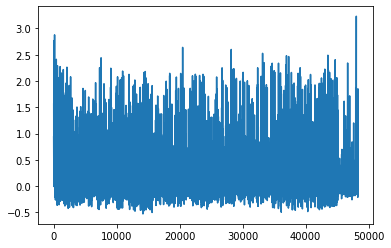

In [19]:
plt.figure()
a = exp_beh.dff_traces.query('cell_roi_id == 1080743723')
a = a['dff'].tolist()[0]
# print(a)
plt.plot(a)
plt.show()

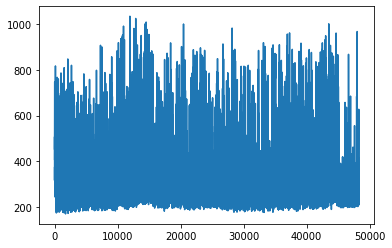

In [20]:
plt.figure()

a = exp_beh.corrected_fluorescence_traces.query('cell_roi_id == 1080743723')
a = a['corrected_fluorescence'].tolist()[0]
# print(a)
plt.plot(a)
plt.show()